<a href="https://colab.research.google.com/github/janakimeena/DL-Lab/blob/master/lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import imdb
from keras.preprocessing import sequence
# Number of words to consider as features
# Cuts off texts after this many words (among the max_features most common words)
max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Using TensorFlow backend.


Loading data...
17465344/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [0]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32,return_sequences = True))
model.add(LSTM(32,return_sequences = True))
model.add(LSTM(32,return_sequences = True))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(input_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 250s 12ms/step - loss: 0.4892 - acc: 0.7546 - val_loss: 0.5060 - val_acc: 0.7616
Epoch 2/10
20000/20000 [==============================] - 249s 12ms/step - loss: 0.3074 - acc: 0.8760 - val_loss: 0.3485 - val_acc: 0.8576
Epoch 3/10
20000/20000 [==============================] - 248s 12ms/step - loss: 0.2431 - acc: 0.9085 - val_loss: 0.3888 - val_acc: 0.8374
Epoch 4/10
20000/20000 [==============================] - 248s 12ms/step - loss: 0.2081 - acc: 0.9229 - val_loss: 0.4259 - val_acc: 0.8654
Epoch 5/10
20000/20000 [==============================] - 248s 12ms/step - loss: 0.1815 - acc: 0.9366 - val_loss: 0.3637 - val_acc: 0.8522
Epoch 6/10
20000/20000 [==============================] - 250s 12ms/step - loss: 0.1561 - acc: 0.9420 - val_loss: 0.3987 - val_acc: 0.8520
Epoch 7/10
20000/20000 [==============================] - 251s 13ms/step - loss: 0.1421 - acc: 0.9504 - val_loss: 0.3

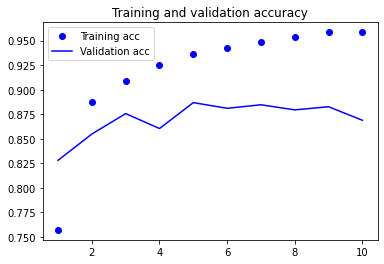

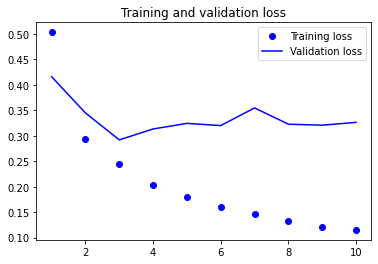

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()